In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_data.csv
/kaggle/input/titanic/test_data.csv


# Importing data

In [2]:
input_ads = pd.read_csv('../input/titanic/train_data.csv')
input_ads.drop(columns=['Unnamed: 0','Title_1','Title_2','Title_3','Title_4'],inplace=True) #Dropping un-necessary columns
#-----------------------------------------------------------------
print(input_ads.shape)
input_ads.head()

(792, 12)


,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Emb_1,Emb_2,Emb_3
0,1,0,1,0.2750,0.014151,0,0,1,0.1,0,0,1
1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0
2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,1
3,4,1,0,0.4375,0.103644,1,0,0,0.1,0,0,1
4,5,0,1,0.4375,0.015713,0,0,1,0.0,0,0,1


# Null Check

In [3]:
pd.DataFrame(input_ads.isnull().sum()).T

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Emb_1,Emb_2,Emb_3
0,0,0,0,0,0,0,0,0,0,0,0,0


# Description of the data

In [4]:
input_ads.describe()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Emb_1,Emb_2,Emb_3
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,396.500000,0.386364,0.647727,0.368244,0.064677,0.243687,0.208333,0.547980,0.088636,0.185606,0.092172,0.720960
std,228.774999,0.487223,0.477980,0.162994,0.100987,0.429577,0.406373,0.498007,0.154485,0.389034,0.289451,0.448811
min,1.000000,0.000000,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,198.750000,0.000000,0.000000,0.275000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,396.500000,0.000000,1.000000,0.350000,0.028302,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,594.250000,1.000000,1.000000,0.437500,0.061045,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,1.000000
max,792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Description of target variable

In [5]:
#Total survived vs not-survived split in the training data
input_ads['Survived'].value_counts()

0    486
1    306
Name: Survived, dtype: int64

# Manipulation of data into train-test

In [6]:
target = 'Survived' #To predict

#--------------------------------------------------------------------------------
#Splitting into X & Y datasets (supervised training)
X = input_ads[[cols for cols in list(input_ads.columns) if target not in cols]]
y = input_ads[target]

#--------------------------------------------------------------------------------
#Since test data is already placed in the input folder separately, we will just import it
test_ads = pd.read_csv('../input/titanic/test_data.csv')
test_ads.drop(columns=['Unnamed: 0','Title_1','Title_2','Title_3','Title_4'],inplace=True) #Dropping un-necessary columns

#Splitting into X & Y datasets (supervised training)
X_test = test_ads[[cols for cols in list(test_ads.columns) if target not in cols]]
y_test = test_ads[target]

print('Train % of total data:',100 * X.shape[0]/(X.shape[0] + X_test.shape[0]))
#--------------------------------------------------------------------------------
#Manipulation of datasets for convenience and consistency
X_arr = np.array(X)
X_test_arr = np.array(X_test)

y_arr = np.array(y).reshape(X_arr.shape[0],1)
y_test_arr = np.array(y_test).reshape(X_test_arr.shape[0],1)

#--------------------------------------------------------------------------------
#Basic Summary
print(X_arr.shape)
print(X_test_arr.shape)
print(y_arr.shape)

Train % of total data: 88.78923766816143
(792, 11)
(100, 11)
(792, 1)


# Standard scaling the x-data

In [7]:
from sklearn.preprocessing import StandardScaler

#----------------------------------------------------------
scaler = StandardScaler()
X_arr = scaler.fit_transform(X_arr)
X_test_arr = scaler.transform(X_test_arr)

#----------------------------------------------------------
X_arr[0:3]

array([[-1.72986525,  0.73746841, -0.57243072, -0.50063632, -0.56762987,
        -0.51298918,  0.90823168,  0.07360462, -0.47739604, -0.31863757,
         0.62212561],
       [-1.72549138, -1.35599029,  0.65538585,  0.73777138,  1.76171137,
        -0.51298918, -1.10104065,  0.07360462,  2.0946969 , -0.31863757,
        -1.60739242],
       [-1.72111752, -1.35599029, -0.26547658, -0.48758178, -0.56762987,
        -0.51298918,  0.90823168, -0.57411602, -0.47739604, -0.31863757,
         0.62212561]])

# Artificial Neural Network (ANN) from Scratch

## UDFs for activation, initialization, layer_propagation

In [8]:
#All popular activation functions
def activation_fn(z,type_):
    
    #print('Activation : ',type_)
    
    if type_=='linear':
        activated_arr = z
    
    elif type_=='sigmoid':
        activated_arr = 1/(1+np.exp(-z))
    
    elif type_=='relu': 
        activated_arr = np.maximum(np.zeros(z.shape),z)
    
    elif type_=='tanh':
        activated_arr = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    elif type_=='leaky_relu':
        activated_arr = np.maximum(0.01*z,z)
    
    elif type_=='softmax':
        exp_ = np.exp(z)
        exp_sum = np.sum(exp_)
        activated_arr = exp_/exp_sum
        
    return activated_arr

#----------------------------------------------------------------------------------------------------------------------------
#Initialization of params
def generate_param_grid(a_prev,n_hidden,hidden_size_list):
    
    parameters = {}
    features = a_prev.shape[0] #Total features
    n_examples = a_prev.shape[1]
    
    for n_hidden_idx in range(1,n_hidden+1):
        
        n_hidden_nodes = hidden_size_list[n_hidden_idx] #Should start from 0
        
        #print('#------------ Layer :',n_hidden_idx,'---- Size :',n_hidden_nodes,'---- Prev features :',features,'------#')

        parameters['w' + str(n_hidden_idx)] = np.random.rand(n_hidden_nodes,features) * 0.1 #Xavier Initialization
        parameters['b' + str(n_hidden_idx)] = np.zeros((n_hidden_nodes,1)) * 0.1
        
        features = n_hidden_nodes
    
    return parameters#Return randomly initiated params
    
#---------------------------------------------------------------------------------------------------------------------------
#Propagation between z and activation
def layer_propagation(a_prev,w,b,activation):
    
    #print(a_prev.shape)
    #print(w.shape)
    #print(b.shape)
    
    z_ = np.dot(w,a_prev) + b
    
    a = activation_fn(z=z_,
                      type_=activation)
    
    return z_,a

## UDF for forward propagation

In [9]:
def forward_propagation(params_dict,data_x,data_y,n_hidden,hidden_size_list,activation_list):
    
    cache = {'a0' : data_x.T}
    a = data_x.T.copy()
    
    for layer_idx in range(1,n_hidden+1):
        
        #print('#---------- Layer :',layer_idx,'-- No of Nodes :',hidden_size_list[layer_idx])
        #nodes = hidden_size_list[layer_idx]
        activation_ = activation_list[layer_idx]
        w_ = params_dict['w'+str(layer_idx)]
        b_ = params_dict['b'+str(layer_idx)]
        
        z,a = layer_propagation(a_prev=a,
                                 w=w_,
                                 b=b_,
                                 activation=activation_)
        
        cache['z'+str(layer_idx)] = z
        cache['a'+str(layer_idx)] = a
    
    return cache,a

## UDF for cost calculation, gradient calculation & back-propagation 

In [10]:
#Calculation of the total cost incurred by the model
def cost_calculation(activation_list,y_true,y_pred):
    
    if activation_list[-1]=='sigmoid':
        #print('sig')
        m = y_true.shape[1]
        cost = (-1/m) * np.sum((y_true * np.log(y_pred)) + ((1-y_true) * np.log(1 - y_pred)))
        
    elif activation_list[-1]=='linear':
        
        m = y_true.shape[1]
        cost = (1/m) * np.sum(np.square(y_true-y_pred))
        
     ##-------------------->> Softmax to be added <<----------------------
    
    return cost

#Gradient of the activation functions wrt corresponding z
#--------------------------------------------------------------------------------------------
#Gradient for each activation type
def grad_fn_dz(activation,a):
    
    if activation=='linear':
        grad = 1
     
    elif activation=='sigmoid':
        grad = a*(1-a)
        
    elif activation=='tanh':
        grad = np.square(1-a)
        
    elif activation=='relu':
        grad = np.where(a>=0,1,0)
    
    elif activation=='leaky_relu':
        grad = np.where(a>=0,1,0.01)
    
    ##-------------------->> Softmax to be added <<----------------------
    
    return grad
        
#--------------------------------------------------------------------------------------------
#UDF for gradient of loss function wrt last layer
def dL_last_layer(activation_list,y_true,y_pred):
    
    if activation_list[-1]=='sigmoid':
        
        #print('Last Layer y true shape :',y_true.shape)
        #print('Last Layer y pred shape :',y_pred.shape)
        
        grad_final_layer = -((y_true/y_pred) - ((1-y_true)/(1-y_pred)))
        #print('Last Layer gradient shape :',grad_final_layer.shape)
        
    elif activation_list[-1]=='linear':
        
        grad_final_layer = - 2 * (y_true-y_pred) #Check the sign
        
    return grad_final_layer

#--------------------------------------------------------------------------------------------
#Back=Propagation         
def back_propagation(cache,params_dict,data_x,data_y,n_hidden,hidden_size_list,activation_list,y_pred):
    
    grads_cache = {}
    #db_cache = {}
    
    da = dL_last_layer(activation_list=activation_list,
                             y_true=data_y.T,
                             y_pred=y_pred)
    #print('Final da shape :',da.shape)
    
    m = data_y.shape[0] #Data in the batches
    
    #print('dm in backprop :',m)
    for layer_idx in list(reversed(range(1,n_hidden+1))):
        
        #print('# -------- Layer :',layer_idx,'-------- Size :',hidden_size_list[layer_idx],'--------#')
        
        activation_ = activation_list[layer_idx]
        a = cache['a'+str(layer_idx)]
        a_prev = cache['a'+str(layer_idx-1)]
        w = params_dict['w'+str(layer_idx)]
        
#         print('Shape of a:',a.shape)
#         print('Shape of a_prev:',a_prev.shape)
#         print('SHape of w:',w.shape)
        
        #z = 
        
        dz =  da * (grad_fn_dz(activation=activation_,a=a))
        
        #print('dz shape :',dz.shape)
                     
        dw = (1/m) * np.dot(dz, a_prev.T)
        #print('dw shape :',dw.shape)
        grads_cache['dw'+str(layer_idx)] = dw
                     
        db = (1/m) * np.sum(dz, axis=1,keepdims=True)
        #print('db shape :',db.shape)
        grads_cache['db'+str(layer_idx)] = db
        
        da = np.dot(w.T,dz)
        #print('da shape :',da.shape)

    return grads_cache

## UDF for updating weights through gradient descent

In [11]:
def update_weights(params,grads_cache,alpha,n_hidden):
    
    for layer_idx in list(reversed(range(1,n_hidden+1))):
        
        #print('#---- layer :',layer_idx,'----#')
        
        dw = grads_cache['dw'+str(layer_idx)]
        db = grads_cache['db'+str(layer_idx)]
        
#         print('dw shape :',dw.shape)
#         print('db shape :',db.shape)
#         print('w shape :',params['w'+str(layer_idx)].shape)
        
        params['w'+str(layer_idx)] -= alpha * dw
        params['b'+str(layer_idx)] -= alpha * db

    
    return params

## UDF for predictions

In [12]:
def prediction(params,test_x,n_hidden,hidden_size_list,activation_list,threshold):
    
    #-----------------------------------------------------------------
    #Forward Propagation on trained weights
    cache,y_pred = forward_propagation(params_dict=params,
                                  data_x=test_x,
                                  data_y=None,
                                  n_hidden=n_hidden,
                                  hidden_size_list=hidden_size_list,
                                  activation_list=activation_list)
    #print(cache)
    preds = np.where(y_pred>threshold,1,0).astype(float)
    return cache,np.round(y_pred,4),preds

## Simple Gradient Descent

In [13]:
def ANN_train_gd(data_x,data_y,alpha,n_iters,n_hidden,hidden_size_list,activation_list):

    cost_history = [] #Record of cost through epochs

    #-------------------------------------------------------------------------
    #Initialization of params
    params_dict = generate_param_grid(a_prev=data_x.T,
                             n_hidden=n_hidden,
                             hidden_size_list=hidden_size_list)
    print('#----------------- Initial params ------------------#')
    print(params_dict)
    initial_params_abcd = params_dict.copy()
    
    #-------------------------------------------------------------------------------------------
    cache_tray = []

    for epoch in range(n_iters):

        if (epoch>0) & (epoch%1000==0):
            print('#----------------------------------- Epoch :',epoch,'--------------------------------------#')
            print('cost :',cost)

        #-------------------------------------------------------------------------
        #Forward Propagation
        cache,y_pred = forward_propagation(params_dict=params_dict,
                                      data_x=data_x,
                                      data_y=data_y,
                                      n_hidden=n_hidden,
                                      hidden_size_list=hidden_size_list,
                                      activation_list=activation_list)
        #print(np.max(y_pred))
        cache_tray.append(cache)
        #-------------------------------------------------------------------------
        #Cost calculation
        cost = cost_calculation(activation_list=activation_list,
                         y_true=data_y.T,
                         y_pred=y_pred)

        cost_history.append(cost)
        #print('cost :',cost)

        #-------------------------------------------------------------------------
        #Back Propagation
        grads_cache_ = back_propagation(cache=cache,
                                       params_dict=params_dict,
                                       data_x=data_x,
                                       data_y=data_y,
                                       n_hidden=n_hidden,
                                       hidden_size_list=hidden_size_list,
                                       activation_list=activation_list,
                                       y_pred=y_pred)

        #------------------------------------------------------------------------
        #Updating weights
        params_dict = update_weights(params=params_dict,
                                     grads_cache=grads_cache_,
                                     alpha=alpha,
                                     n_hidden=n_hidden)



    return initial_params_abcd,params_dict,grads_cache_,cost_history,y_pred,cache_tray


In [14]:
def ANN_train_gd(data_x_overall,data_y_overall,batch_size,alpha,n_iters,n_hidden,hidden_size_list,activation_list):
    
    print('Total training rows :',data_x_overall.shape[0])
    
    #----------------------------------------------------------------------------------------
    #Creating x-y batches according to the provided batch_size
    
    n_batches = data_x_overall.shape[0]//batch_size
    print('Total Batches to create in each epoch/iter :',n_batches)
    
    batches_x = np.array_split(data_x_overall,n_batches)
    print('Total Batches of X:',len(batches_x))

    batches_y = np.array_split(data_y_overall,n_batches)
    print('Total Batches of y:',len(batches_y))
    #-------------------------------------------------------------------------------------------
    cost_history = [] #Record of cost through epochs

    #-------------------------------------------------------------------------------------------
    #Initialization of params
    params_dict = generate_param_grid(a_prev=data_x_overall.T,
                             n_hidden=n_hidden,
                             hidden_size_list=hidden_size_list)
    print('#----------------- Initial params ------------------#')
    print(params_dict)
    initial_params_abcd = params_dict.copy()
    
    #-------------------------------------------------------------------------------------------
    cache_tray = []

    for epoch in range(n_iters):

        if (epoch>0) & (epoch%1000==0):
            print('#----------------------------------- Epoch :',epoch,'--------------------------------------#')
            print('cost :',cost)
            
        for j in range(len(batches_x)): #For each batch created for each epoch/iter
            
            #-------------------------------------------------------------------------
            #For each batch of data
            data_x = batches_x[j]
            data_y = batches_y[j]

            #-------------------------------------------------------------------------
            #Forward Propagation
            cache,y_pred = forward_propagation(params_dict=params_dict,
                                          data_x=data_x,
                                          data_y=data_y,
                                          n_hidden=n_hidden,
                                          hidden_size_list=hidden_size_list,
                                          activation_list=activation_list)
            #print(np.max(y_pred))
            #cache_tray.append(cache)
            #-------------------------------------------------------------------------
            #Cost calculation
            cost = cost_calculation(activation_list=activation_list,
                             y_true=data_y.T,
                             y_pred=y_pred)

            #cost_history.append(cost)
            #print('cost :',cost)

            #-------------------------------------------------------------------------
            #Back Propagation
            grads_cache_ = back_propagation(cache=cache,
                                           params_dict=params_dict,
                                           data_x=data_x,
                                           data_y=data_y,
                                           n_hidden=n_hidden,
                                           hidden_size_list=hidden_size_list,
                                           activation_list=activation_list,
                                           y_pred=y_pred)

            #------------------------------------------------------------------------
            #Updating weights
            params_dict = update_weights(params=params_dict,
                                         grads_cache=grads_cache_,
                                         alpha=alpha,
                                         n_hidden=n_hidden)
            
        cost_history.append(cost) #Appending cost after each epoch


    return initial_params_abcd,params_dict,grads_cache_,cost_history,y_pred,cache_tray


In [15]:
#Defining hyper-parameters for ANN
#--------------------------------------------------------------------------------------------------------------------------
n_hidden = 2 #No of hidden layers
alpha = 0.003 #Learning_rate
n_iters = 3001 #Total epochs
hidden_size_list = [0,3,1] #first element will be 0 and not counted in hidden layers
activation_list = [0,'relu','sigmoid'] #first element will be 0 and not counted in hidden layers
batch_size = 25 #Batch wise gradient descent

#--------------------------------------------------------------------------------------------------------------------------
initial_params_train,params_dict_train,grads,cost_history_train,y_pred_train,cache_tray = ANN_train_gd(data_x_overall=X_arr,
                                                                                                       data_y_overall=y_arr,
                                                                                                       batch_size=batch_size,
                                                                                                       alpha=alpha,
                                                                                                       n_iters=n_iters,
                                                                                                       n_hidden=n_hidden,
                                                                                                       hidden_size_list=hidden_size_list,
                                                                                                       activation_list=activation_list)

Total training rows : 792
Total Batches to create in each epoch/iter : 31
Total Batches of X: 31
Total Batches of y: 31
#----------------- Initial params ------------------#
{'w1': array([[0.04510764, 0.06361383, 0.00880061, 0.02615112, 0.08093248,
        0.08311373, 0.08617793, 0.05548943, 0.03234432, 0.08278441,
        0.04659102],
       [0.00127643, 0.06493572, 0.0372784 , 0.05727731, 0.08548677,
        0.08490235, 0.08945623, 0.03356363, 0.09211904, 0.01745288,
        0.05916095],
       [0.05493394, 0.09414194, 0.09378215, 0.05834174, 0.02307216,
        0.05233622, 0.09354641, 0.05312116, 0.04589019, 0.07273628,
        0.05006775]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'w2': array([[0.0138827 , 0.05486773, 0.03538424]]), 'b2': array([[0.]])}
#----------------------------------- Epoch : 1000 --------------------------------------#
cost : 0.35543165709207286
#----------------------------------- Epoch : 2000 --------------------------------------#
cost : 0.354837548

# Cost-Epoch plot for the manual ANN training 

[Text(0.5, 0, 'epochs'),
 Text(0, 0.5, 'cost'),
 Text(0.5, 1.0, 'Cost vs epoch plot for Manual ANN')]

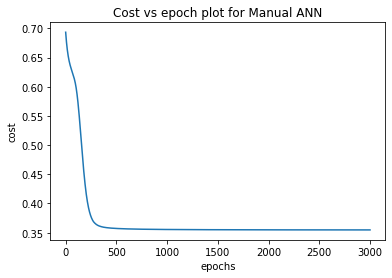

In [16]:
#Cost plot over epochs (1 value at end of each epoch) - over the last batch
ax = sns.lineplot(x=list(range(n_iters)),y=cost_history_train)
ax.set(xlabel='epochs',ylabel='cost',title='Cost vs epoch plot for Manual ANN')

# Predict on the test data

In [17]:
cache,preds_proba,manual_preds = prediction(params=params_dict_train,
                                            test_x=X_test_arr,
                                            n_hidden=n_hidden,
                                            hidden_size_list=hidden_size_list,
                                            activation_list=activation_list,
                                            threshold=0.5)

#-------------------------------------------------------------------------------------------
print('Shape of prediction array :',preds_proba.shape)
print('Unique predictions :',np.unique(manual_preds))
print('Unique of predict proba :',np.unique(preds_proba),'\n')

print('#--------------------- Evaluation ----------------------#')
#Evaluation of the predictions
print('ROC AUC of test set :',roc_auc_score(y_test_arr.ravel(),manual_preds.ravel()))
print('Accuracy of test set :',accuracy_score(y_test_arr.ravel(),manual_preds.ravel()))

Shape of prediction array : (1, 100)
Unique predictions : [0. 1.]
Unique of predict proba : [0.0347 0.044  0.0732 0.0814 0.0895 0.0912 0.0951 0.1012 0.1024 0.1054
 0.1109 0.1149 0.1161 0.1171 0.1173 0.1182 0.1186 0.1207 0.1233 0.1235
 0.1236 0.1262 0.1266 0.1289 0.1291 0.1306 0.1316 0.1318 0.1319 0.136
 0.1361 0.1375 0.1432 0.1458 0.1463 0.1492 0.1524 0.1555 0.1634 0.1653
 0.1656 0.1805 0.1806 0.182  0.196  0.1968 0.1993 0.2134 0.2239 0.2274
 0.2315 0.2406 0.244  0.2739 0.2789 0.2963 0.3293 0.3335 0.3454 0.4066
 0.4291 0.4381 0.4485 0.4538 0.4688 0.5036 0.5119 0.5479 0.5732 0.5958
 0.615  0.6153 0.631  0.6347 0.6356 0.6484 0.6619 0.7824 0.8017 0.8111
 0.8112 0.8455 0.8651 0.912  0.9307 0.9363 0.9414 0.9464 0.9476 0.9498
 0.9533 0.9554 0.9634 0.9723 0.9793 0.987  0.9874 0.9892 0.9895] 

#--------------------- Evaluation ----------------------#
ROC AUC of test set : 0.8203125
Accuracy of test set : 0.84


# Benchmarking with Keras functional API

## Importing necessary libraries

In [18]:
import tensorflow as tf
import keras
import tensorflow.keras.models
import tensorflow.keras.layers as tfl
from tensorflow.keras import Input
from tensorflow.keras import Model
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization

## Defining the model with same specifications as manual 

In [19]:
def ANN_keras(x):
    
    input_ = tfl.Input(shape=(x.shape[1],))
    
    x = tfl.Dense(3,activation='relu', name = 'Dense_3')(input_) #Layer 1
    
    preds = tfl.Dense(1, activation="sigmoid", name="pred")(x) #Output layer
    
    model = Model(input_, preds, name="ANN_keras")
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=alpha))
    
    return model
    
model = ANN_keras(X_arr)
model.summary()

Model: "ANN_keras"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
Dense_3 (Dense)              (None, 3)                 36        
_________________________________________________________________
pred (Dense)                 (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [20]:
history = model.fit(X_arr,y_arr, epochs=101, batch_size=X_arr.shape[0],
                    validation_data = (X_test_arr,y_test_arr),verbose=0)

In [21]:
history = model.fit(X_arr,y_arr, epochs=101, batch_size=25,
                    validation_data = (X_test_arr,y_test_arr),verbose=0)

## Predicting through keras model

In [22]:
keras_pred = model.predict(X_test_arr)
keras_pred = np.where(keras_pred>0.5,1,0)

#print(np.unique(keras_pred))
print('#--------------------- Evaluation ----------------------#')
#Evaluation of the predictions
print('ROC AUC of test set :',roc_auc_score(y_test_arr.ravel(),keras_pred.ravel()))
print('Accuracy of test set :',accuracy_score(y_test_arr.ravel(),keras_pred.ravel()))

#--------------------- Evaluation ----------------------#
ROC AUC of test set : 0.7907986111111112
Accuracy of test set : 0.81
